In [1]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
X = [[1,2,3],
     [11,12,13]]
y = [0,1]
clf.fit(X,y)

RandomForestClassifier(random_state=0)

In [2]:
clf.predict(X)

array([0, 1])

In [3]:
clf.predict([[4, 5, 6], [14, 15, 16]])

array([0, 1])

In [4]:
from sklearn.preprocessing import StandardScaler
X = [[0,15],
    [1,-10]]
StandardScaler().fit(X).transform(X)

array([[-1.,  1.],
       [ 1., -1.]])

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

In [7]:
X,y =load_iris(return_X_y=True) 
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [8]:
pipe.fit(X_train,y_train)
accuracy_score(pipe.predict(X_test), y_test)

0.9736842105263158

Model evaluation¶

In [9]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import cross_validation
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
X,y = make_regression(n_samples=1000, random_state=0)

In [10]:
lr = LinearRegression()

In [11]:
#result = cross_validate(lr, X, y)  # defaults to 5-fold CV
#result['test_score']  # r_squared score is high because dataset is easy
kfold = KFold(5, True, 1)
# enumerate splits
#for train, test in kfold.split(X):
#	print('train: %s, test: %s' % (X[train], X[test]))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Automatic parameter searches

In [12]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import randint

X,y = fetch_california_housing(return_X_y=True)
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [13]:
X_train.shape

(15480, 8)

In [14]:
param_distributions = {'n_estimators': randint(1, 5),
                       'max_depth': randint(5, 10)}

In [15]:
# now create a searchCV object and fit it to the data
search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0),
                            n_iter=5,
                            param_distributions=param_distributions,
                            random_state=0)
search.fit(X_train, y_train)




search.best_params_

{'max_depth': 9, 'n_estimators': 4}

In [16]:
# the search object now acts like a normal random forest estimator
# with max_depth=9 and n_estimators=4
search.score(X_test, y_test)

0.735363411343253

In [17]:
from sklearn import datasets
from sklearn.svm import SVC

iris = datasets.load_iris()
clf = SVC()  
clf.fit(iris.data,iris.target) 

list(clf.predict(iris.data[:3])) 
clf.fit(iris.data,iris.target_names[iris.target]) 
list(clf.predict(iris.data[:3])) 


['setosa', 'setosa', 'setosa']

In [18]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier 
from sklearn.preprocessing import LabelBinarizer 

X = [[1,2],[2,4],[4,5],[3,2],[3,1]] 
y = [0, 0, 1, 1, 2]
classif = OneVsRestClassifier(estimator=SVC(random_state=0)) 
classif.fit(X, y).predict(X)

array([0, 0, 1, 1, 2])

In [19]:
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
data.shape

(150, 4)

In [21]:
import numpy as np
from sklearn import datasets
iris_X, iris_y = datasets.load_iris(return_X_y=True)
np.unique(iris_y)

array([0, 1, 2])

In [22]:
np.random.seed(0)
indices = np.random.permutation(len(iris_X))  
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)

knn.predict(iris_X_test)

iris_y_test


array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [23]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [24]:
diabetes_X.shape

(442, 10)

In [25]:
diabetes_y.shape

(442,)

In [26]:
diabetes_X_train = diabetes_X[:-20] 
diabetes_X_test = diabetes_X[-20:] 
diabetes_y_train = diabetes_y[:-20] 
diabetes_y_test = diabetes_y[-20:] 


In [27]:
diabetes_y_test

array([233.,  91., 111., 152., 120.,  67., 310.,  94., 183.,  66., 173.,
        72.,  49.,  64.,  48., 178., 104., 132., 220.,  57.])

In [28]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train,diabetes_y_train).coef_

array([ 3.03499549e-01, -2.37639315e+02,  5.10530605e+02,  3.27736980e+02,
       -8.14131709e+02,  4.92814588e+02,  1.02848452e+02,  1.84606489e+02,
        7.43519617e+02,  7.60951722e+01])

In [29]:
np.mean((regr.predict(diabetes_X_test) - diabetes_y_test)**2)

2004.5676026898207

In [30]:
regr.score(diabetes_X_test, diabetes_y_test)

0.5850753022690575

In [31]:
from sklearn import datasets, neighbors, linear_model

X_digits, y_digits = datasets.load_digits(return_X_y=True)
X_digits = X_digits / X_digits.max() 
X_digits

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

In [32]:

from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X_digits,y_digits,test_size=0.2,random_state=123)

In [33]:
# neighbors
clN = neighbors.KNeighborsClassifier() 
clN.fit(X_train,y_train) 
y_predKNeighborsClassifier = clN.predict(X_test)

In [37]:
import pandas as pd 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predKNeighborsClassifier})
df

,Actual,Predicted
0,3,3
1,3,3
2,4,4
3,4,4
4,1,1
...,...,...
355,9,9
356,6,6
357,5,5
358,5,5


In [38]:
# linnear model
clL = linear_model.LogisticRegression(max_iter=1000)
clL.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [39]:
y_predLinearRegression = clL.predict(X_test)

In [40]:
import pandas as pd
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predLinearRegression})
df

,Actual,Predicted
0,3,3
1,3,3
2,4,4
3,4,4
4,1,1
...,...,...
355,9,9
356,6,6
357,5,5
358,5,5


In [41]:
from sklearn import metrics
print('LinearRegression Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predLinearRegression))
print('LinearRegression Mean Squared Error:', metrics.mean_squared_error(y_test, y_predLinearRegression))
print('LinearRegression Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predLinearRegression)))

LinearRegression Mean Absolute Error: 0.14444444444444443
LinearRegression Mean Squared Error: 0.8111111111111111
LinearRegression Root Mean Squared Error: 0.9006170724070864


In [44]:
print('KNeighborsClassifier Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predKNeighborsClassifier))
print('KNeighborsClassifier Mean Squared Error:', metrics.mean_squared_error(y_test, y_predLinearRegression))
print('KNeighborsClassifier Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predLinearRegression)))

KNeighborsClassifier Mean Absolute Error: 0.1111111111111111
KNeighborsClassifier Mean Squared Error: 0.8111111111111111
KNeighborsClassifier Root Mean Squared Error: 0.9006170724070864


In [45]:
print('KNN score: %f' % clN.fit(X_train, y_train).score(X_test, y_test))
print('LogisticRegression score: %f'
      % clL.fit(X_train, y_train).score(X_test, y_test))


KNN score: 0.980556
LogisticRegression score: 0.969444


In [50]:
from sklearn import datasets,svm 
X_digits, y_digits = datasets.load_digits(return_X_y=True) 
svm = svm.SVC(C=1,kernel='linear')

In [52]:
svm.fit(X_digits[:-100], y_digits[:-100]).score(X_digits[100:],y_digits[100:])

0.9988214496169712

In [56]:
import numpy as np
#svc = svm.SVC(C=1, kernel='linear')
X_folds = np.array_split(X_digits, 3)
y_folds = np.array_split(y_digits, 3)
scores = list()
for k in range(3):
    # We use 'list' to copy, in order to 'pop' later on
    X_train = list(X_folds)
    X_test = X_train.pop(k)
    X_train = np.concatenate(X_train)
    y_train = list(y_folds)
    y_test = y_train.pop(k)
    y_train = np.concatenate(y_train)
    scores.append(svm.fit(X_train, y_train).score(X_test, y_test))
print(scores)


[0.9348914858096828, 0.9565943238731218, 0.9398998330550918]


In [57]:
from sklearn.model_selection import KFold, cross_val_score
X = ["a", "a", "a", "b", "b", "c", "c", "c", "c", "c"]
k_fold = KFold(n_splits=5)
for train_indices, test_indices in k_fold.split(X):
     print('Train: %s | test: %s' % (train_indices, test_indices))




Train: [2 3 4 5 6 7 8 9] | test: [0 1]
Train: [0 1 4 5 6 7 8 9] | test: [2 3]
Train: [0 1 2 3 6 7 8 9] | test: [4 5]
Train: [0 1 2 3 4 5 8 9] | test: [6 7]
Train: [0 1 2 3 4 5 6 7] | test: [8 9]


In [59]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import datasets, svm

X_digits, y_digits = datasets.load_digits(return_X_y=True)

svc = svm.SVC(kernel='linear')
C_s = np.logspace(-10, 0, 10)

scores = list() 


In [64]:
X.shape,y.shape

((1797, 64), (1797,))

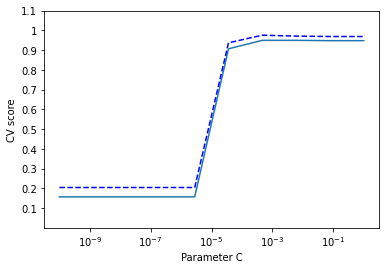

In [109]:
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score

X_train,X_test,y_train,y_test=train_test_split(X_digits,y_digits,test_size=0.2,random_state=123)
scores = list()
scores_std = list()

for c in C_s:
    svc.set_params(C=c)
    #print(c,svc.fit(X_train,y_train).score(X_test,y_test))
    this_scores = cross_val_score(svc, X, y, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))
 

import matplotlib.pyplot as plt
plt.figure()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
#plt.plot(C_s, scores)
#plt.plot(C_s, np.array(scores) + np.array(scores_std), 'b--')
#plt.plot(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0, 1.1)
plt.show()

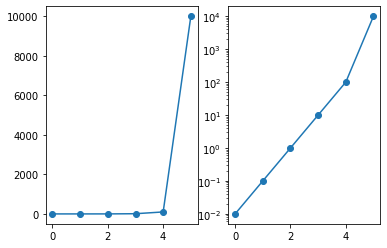

In [106]:
x = [0.01, 0.1, 1, 10, 100, 10000];
plt.subplot(121);
plt.plot(x, '-o');
#grid on;
plt.subplot(122);
plt.semilogy(x, '-o');
#grid on;